In [11]:
import plotly.plotly as py

ImportError: No module named plotly.plotly

In [1]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

conn = sqlite3.connect('../8a.db')
c = conn.cursor()

In [2]:
c.execute("DROP VIEW IF EXISTS FilteredUsers;")

c.execute("""
CREATE VIEW FilteredUsers AS
  SELECT
    height,
    weight,
    ascents,
    ascents_8a,
    ascents_8b
  FROM (
    SELECT
      cast(
          replace(height_string, 'cm', '') AS INT
      )        AS height,
      cast(
          replace(replace(weight_string, 'about', ''), 'kg', '') AS INT
      )        AS weight,
      count(*) AS ascents,
      sum(
          CASE
          WHEN grade IN ('8A', '8A+', '8B', '8B+', '8C', '8C+')
            THEN 1
          ELSE 0
          END
      )        AS ascents_8a,
      sum(
          CASE
          WHEN grade IN ('8B', '8B+', '8C', '8C+')
            THEN 1
          ELSE 0
          END
      )        AS ascents_8b
    FROM Boulders
      JOIN Users ON Boulders.user_id = Users.user_id
    WHERE
      height_string <> '' AND
      weight_string <> ''
    GROUP BY Users.user_id
    HAVING ascents >= 10
  )
  WHERE
    height BETWEEN 120 AND 245;
""")

c.execute("""
SELECT
  height,
  weight
FROM FilteredUsers
WHERE ascents >= 10 AND ascents_8a < 10 AND ascents_8b < 10;
""")

result_set = c.fetchall()
heights = zip(*result_set)[0]
weights = zip(*result_set)[1]
bmis = [w / (h / 100.0)**2 for (h, w) in zip(heights, weights)]

c.execute("""
SELECT
  height,
  weight
FROM FilteredUsers
WHERE ascents_8a >= 10 AND ascents_8b < 10;
""")

result_set = c.fetchall()
heights_8a = zip(*result_set)[0]
weights_8a = zip(*result_set)[1]
bmis_8a = [w / (h / 100.0)**2 for (h, w) in zip(heights_8a, weights_8a)]

c.execute("""
SELECT
  height,
  weight
FROM FilteredUsers
WHERE ascents_8b >= 10;
""")

result_set = c.fetchall()
heights_8b = zip(*result_set)[0]
weights_8b = zip(*result_set)[1]
bmis_8b = [w / (h / 100.0)**2 for (h, w) in zip(heights_8b, weights_8b)]

In [3]:
print "{} total climbers, {} 8a climbers, {} 8b climbers.".format(len(heights), len(heights_8a), len(heights_8b))

6358 total climbers, 480 8a climbers, 97 8b climbers.


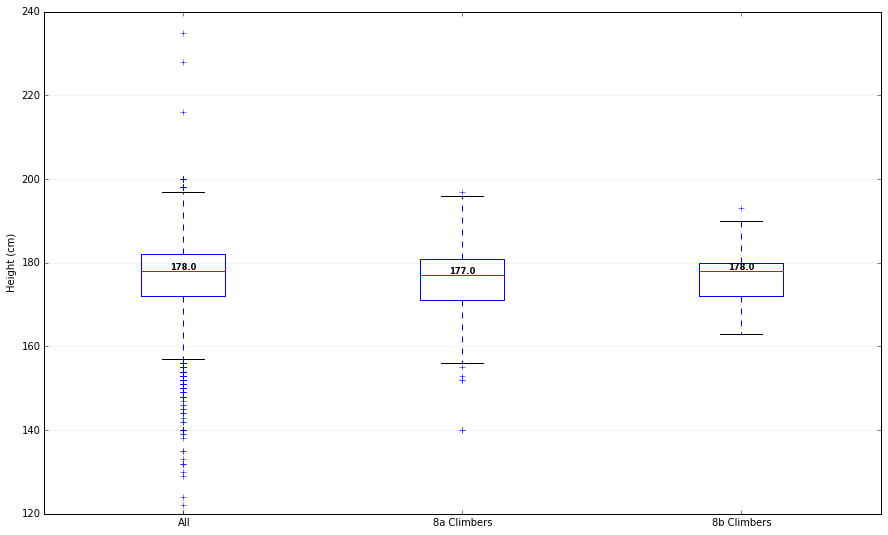

In [4]:
data = [heights, heights_8a, heights_8b]

fig, ax1 = plt.subplots(figsize=(15, 9))
bp = plt.boxplot(data)

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(
    True, linestyle='-', which='major', 
    color='lightgrey', alpha=0.5
)

ax1.set_axisbelow(True)
ax1.set_ylabel('Height (cm)')
xtickNames = plt.setp(ax1, xticklabels=['All', '8a Climbers', '8b Climbers'])

medians = [np.median(pop) for pop in data]
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos, ax1.get_xticklabels()):
    ax1.text(pos[tick] + 1, medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='small', weight='semibold')

In [5]:
print """
| |All Climbers | 8a Climbers | 8b Climbers|
---|-------------|-------------|------------|"""
print "Median | {} | {} | {} |".format(np.median(heights), np.median(heights_8a), np.median(heights_8b))
print "25th Percentile | {} | {} | {} |".format(
    np.percentile(heights, 25), np.percentile(heights_8a, 25), np.percentile(heights_8b, 25)
)
print "75th Percentile | {} | {} | {} |".format(
    np.percentile(heights, 75), np.percentile(heights_8a, 75), np.percentile(heights_8b, 75)
)


| |All Climbers | 8a Climbers | 8b Climbers|
---|-------------|-------------|------------|
Median | 178.0 | 177.0 | 178.0 |
25th Percentile | 172.0 | 171.0 | 172.0 |
75th Percentile | 182.0 | 181.0 | 180.0 |


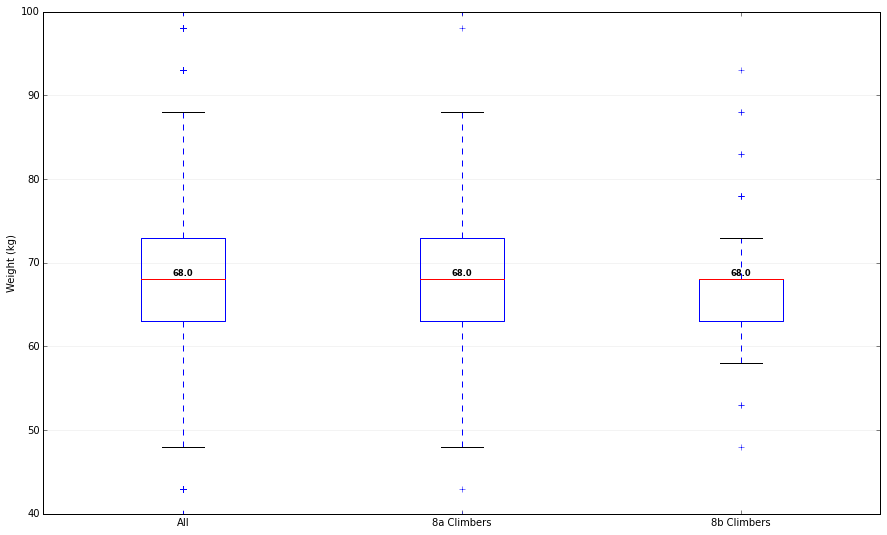

In [6]:
data = [weights, weights_8a, weights_8b]

fig, ax1 = plt.subplots(figsize=(15, 9))
bp = plt.boxplot(data)

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(
    True, linestyle='-', which='major', 
    color='lightgrey', alpha=0.5
)

ax1.set_axisbelow(True)
ax1.set_ylabel('Weight (kg)')
xtickNames = plt.setp(ax1, xticklabels=['All', '8a Climbers', '8b Climbers'])

medians = [np.median(pop) for pop in data]
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos, ax1.get_xticklabels()):
    ax1.text(pos[tick] + 1, medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='small', weight='semibold')

In [7]:
print """
| |All Climbers | 8a Climbers | 8b Climbers|
---|-------------|-------------|------------|"""
print "Median | {} | {} | {} |".format(np.median(weights), np.median(weights_8a), np.median(weights_8b))
print "25th Percentile | {} | {} | {} |".format(
    np.percentile(weights, 25), np.percentile(weights_8a, 25), np.percentile(weights_8b, 25)
)
print "75th Percentile | {} | {} | {} |".format(
    np.percentile(weights, 75), np.percentile(weights_8a, 75), np.percentile(weights_8b, 75)
)


| |All Climbers | 8a Climbers | 8b Climbers|
---|-------------|-------------|------------|
Median | 68.0 | 68.0 | 68.0 |
25th Percentile | 63.0 | 63.0 | 63.0 |
75th Percentile | 73.0 | 73.0 | 68.0 |


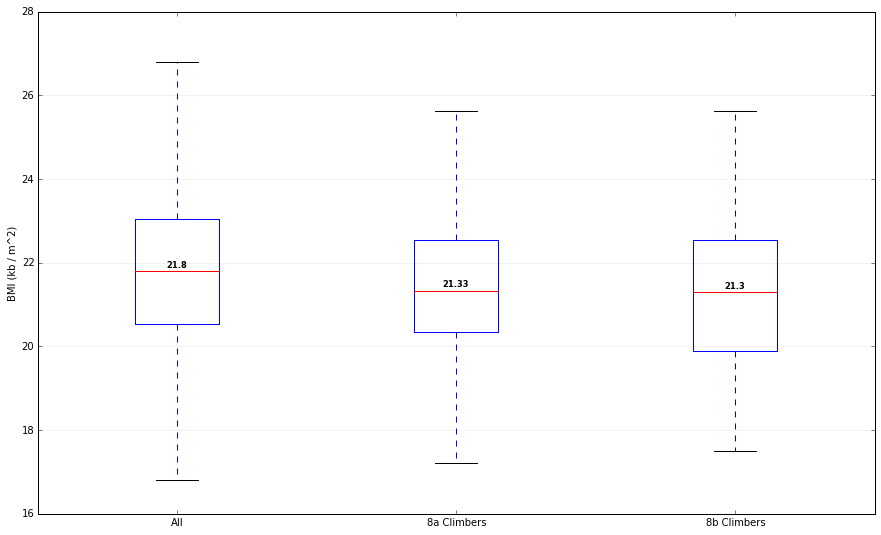

In [8]:
data = [bmis, bmis_8a, bmis_8b]

fig, ax1 = plt.subplots(figsize=(15, 9))
bp = plt.boxplot(data, sym='')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(
    True, linestyle='-', which='major', 
    color='lightgrey', alpha=0.5
)

ax1.set_axisbelow(True)
ax1.set_ylabel('BMI (kb / m^2)')
xtickNames = plt.setp(ax1, xticklabels=['All', '8a Climbers', '8b Climbers'])

medians = [np.median(pop) for pop in data]
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos, ax1.get_xticklabels()):
    ax1.text(pos[tick] + 1, medians[tick] + 0.1, median_labels[tick], 
            horizontalalignment='center', size='small', weight='semibold')

In [9]:
print """
| |All Climbers | 8a Climbers | 8b Climbers|
---|-------------|-------------|------------|"""
print "Median | {:.2f} | {:.2f} | {:.2f} |".format(np.median(bmis), np.median(bmis_8a), np.median(bmis_8b))
print "25th Percentile | {:.2f} | {:.2f} | {:.2f} |".format(
    np.percentile(bmis, 25), np.percentile(bmis_8a, 25), np.percentile(bmis_8b, 25)
)
print "75th Percentile | {:.2f} | {:.2f} | {:.2f} |".format(
    np.percentile(bmis, 75), np.percentile(bmis_8a, 75), np.percentile(bmis_8b, 75)
)


| |All Climbers | 8a Climbers | 8b Climbers|
---|-------------|-------------|------------|
Median | 21.80 | 21.33 | 21.30 |
25th Percentile | 20.53 | 20.34 | 19.88 |
75th Percentile | 23.04 | 22.53 | 22.53 |


In [10]:
def remove_outliers(data):
    low_quartile = np.percentile(data, 25)
    high_quartile = np.percentile(data, 75)
    iqr = high_quartile - low_quartile
    return [
        datum for datum in data
        if low_quartile - iqr <= datum <= high_quartile + iqr
    ]

def ttest_ind_remove_outliers(a, b, equal_var=True, should_remove_outliers=True):
    if should_remove_outliers:
        return stats.ttest_ind(remove_outliers(a), remove_outliers(b), equal_var=equal_var)
    else:
        return stats.ttest_ind(a, b, equal_var=equal_var)

equal_var = False
should_remove_outliers = True

print "BMIs"
print "#"*80

print "All, 8a: {}".format(ttest_ind_remove_outliers(bmis, bmis_8a, equal_var=equal_var, should_remove_outliers=should_remove_outliers))
print "All, 8b: {}".format(ttest_ind_remove_outliers(bmis, bmis_8b, equal_var=equal_var, should_remove_outliers=should_remove_outliers))
print "8a, 8b: {}".format(ttest_ind_remove_outliers(bmis_8a, bmis_8b, equal_var=equal_var, should_remove_outliers=should_remove_outliers))

print """
Weights"""
print "#"*80

print "All, 8a: {}".format(ttest_ind_remove_outliers(weights, weights_8a, equal_var=equal_var, should_remove_outliers=should_remove_outliers))
print "All, 8b: {}".format(ttest_ind_remove_outliers(weights, weights_8b, equal_var=equal_var, should_remove_outliers=should_remove_outliers))
print "8a, 8b: {}".format(ttest_ind_remove_outliers(weights_8a, weights_8b, equal_var=equal_var, should_remove_outliers=should_remove_outliers))

print """
Heights"""
print "#"*80

print "All, 8a: {}".format(ttest_ind_remove_outliers(heights, heights_8a, equal_var=equal_var, should_remove_outliers=should_remove_outliers))
print "All, 8b: {}".format(ttest_ind_remove_outliers(heights, heights_8b, equal_var=equal_var, should_remove_outliers=should_remove_outliers))
print "8a, 8b: {}".format(ttest_ind_remove_outliers(heights_8a, heights_8b, equal_var=equal_var, should_remove_outliers=should_remove_outliers))

BMIs
################################################################################
All, 8a: (4.9404298214479132, 1.0382184148337597e-06)
All, 8b: (2.5892233570559098, 0.011096337947762503)
8a, 8b: (0.42591628286792443, 0.67088162399094031)

Weights
################################################################################
All, 8a: (4.8563970081064927, 1.5559657004223712e-06)
All, 8b: (5.5209851173724775, 3.2323390730842804e-07)
8a, 8b: (1.9886889681255144, 0.048433811645671551)

Heights
################################################################################
All, 8a: (1.9791061893603772, 0.048313737049910051)
All, 8b: (1.5372659651520377, 0.12758584688564067)
8a, 8b: (0.46449318262129269, 0.64302047203140211)
